# Implementing machine learning to predict credit card approval for applicants
## By Ria Tilak Bhattacharya
## Registration Number :  2214122

# Table of contents
1. [Introduction](#introduction)
   1. [Preliminary Analysis](#PrelimAnalysis)
   2. [Data Imbalance](#DataImbalance)
2. [Exploratory Data Analysis](#EDA) 
   1. [Univariate Data Analysis](#Uni)
   2. [Bivariate Data Analysis](#Bi)
3. [Correlation Map](#corr)  
4. [Methods](#methods)
    1. [Train and test data sets](#traintest)
    2. [Feature Importances](#imp)
    3. [Normalize and Scaling the data](#scale)
    4. [Choosing the best parameters for the model](#param)
    5. [Model Metrics](#metrics)
    6. [k fold cross validation](#cv)
    7. [Prediction on train and test models](#pred)
    8. [Ensemble Voting Classifier](#ensemble)
    9. [Compare the train and test scores for the models](#compare)
    10. [Prediction results](#predresults)
    11. [Explainable AI](#AI)
    12. [Results and conclusion](#Result)

# Introduction <a name="introduction"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
#set the working directory and load the dataset cotaining personal information about the client
CC = pd.read_csv("C:/Users/USER/Desktop/Projects/Dissertation/application_record.csv") 
#information about the dataset
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [3]:
#load the second dataset containing customer credit information
creditinfo = pd.read_csv("C:/Users/USER/Desktop/Projects/Dissertation/credit_record.csv") 
#information about the dataset
creditinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


#### The first dataset has 438,557 records and only the  Occupation column has 134,203 blank records. The three columns of the second dataset have no null values.

# Preliminary Analysis <a name="PrelimAnalysis"></a>

## Data Pre processing

In [4]:
#Check for the total number of unique customer IDs in both the datasets
print('Total Number of unique customer IDs in the first dataset:',CC['ID'].nunique())
print('Total Number of unique customer IDs in the second dataset:',creditinfo['ID'].nunique())
print('Number of unique customer IDs  present in both datasets:',CC[CC['ID'].isin(creditinfo['ID'])]['ID'].nunique())

Total Number of unique customer IDs in the first dataset: 438510
Total Number of unique customer IDs in the second dataset: 45985
Number of unique customer IDs  present in both datasets: 36457


In [5]:
#select the IDs present in both datasets
CC= CC[CC['ID'].isin(creditinfo['ID'])]
creditinfo = creditinfo[creditinfo['ID'].isin(CC['ID'])]

In [6]:
## check the number of records
CC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

In [7]:
## check the number of records
creditinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 92938 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              777715 non-null  int64 
 1   MONTHS_BALANCE  777715 non-null  int64 
 2   STATUS          777715 non-null  object
dtypes: int64(2), object(1)
memory usage: 23.7+ MB


#### CC dataset now has 36457 records and creditinfo has 777715 records.

In [8]:
CC.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1


#### STATUS: 
Payment status.
0: 1-29 days past due 
1: 30-59 days past due 
2: 60-89 days overdue 
3: 90-119 days overdue 
4: 120-149 days overdue 
5: Overdue or bad debts, write-offs for more than 150 days 
C: paid off that month 
X: No loan for the month.
Customers with more than 90 days overdue are labeled as Bad customers,with no loans(STATUS X) are marked as no records of loan,and with those of more than one month overdue are neither in the good or bad bracket.Customers with status 0 and C are labeled good customers.

In [9]:
# label the data as good and bad customers
def label_bad(df):
    if (df["STATUS"]=='3') | (df["STATUS"]=='4') | (df["STATUS"]=='5'): # bad
        return 2
    elif (df["STATUS"]=='X'): # no record
        return -1
    elif  (df["STATUS"]=='1') | (df["STATUS"]=='2'): # neither good nor bad
        return 1
    else:
        return 0

#### We filter the months balance column and take the data of equal to or more than the last 12 months.

In [10]:
creditinfo["MONTHS_BALANCE"] = -creditinfo["MONTHS_BALANCE"]
creditinfo = creditinfo[creditinfo["MONTHS_BALANCE"]>=12]
creditinfo["group"] = creditinfo.apply(label_bad, axis=1)

In [11]:
creditinfo_labeled = creditinfo[['ID','group',"MONTHS_BALANCE"]].groupby('ID',as_index=False).max()

In [12]:
# Customer with only X status is removed (no loan record) (labeled as -1)
creditinfo_labeled = creditinfo_labeled[creditinfo_labeled['group']!=-1]
# Customers with status 1 and 2 removed as they are neither in good or bad category (labeled as 1)
creditinfo_labeled = creditinfo_labeled[creditinfo_labeled['group']!=1]
# Tag Bad_customer as 1 instead (former = 2)
creditinfo_labeled['group'] = (creditinfo_labeled['group']/2).apply(np.int32)
creditinfo_labeled =  creditinfo_labeled.drop('MONTHS_BALANCE', axis=1)

In [13]:
# merge the two datasets
creditinfo_labeled = CC.merge(creditinfo_labeled,on='ID',how='inner')

In [14]:
creditinfo_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21934 entries, 0 to 21933
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   21934 non-null  int64  
 1   CODE_GENDER          21934 non-null  object 
 2   FLAG_OWN_CAR         21934 non-null  object 
 3   FLAG_OWN_REALTY      21934 non-null  object 
 4   CNT_CHILDREN         21934 non-null  int64  
 5   AMT_INCOME_TOTAL     21934 non-null  float64
 6   NAME_INCOME_TYPE     21934 non-null  object 
 7   NAME_EDUCATION_TYPE  21934 non-null  object 
 8   NAME_FAMILY_STATUS   21934 non-null  object 
 9   NAME_HOUSING_TYPE    21934 non-null  object 
 10  DAYS_BIRTH           21934 non-null  int64  
 11  DAYS_EMPLOYED        21934 non-null  int64  
 12  FLAG_MOBIL           21934 non-null  int64  
 13  FLAG_WORK_PHONE      21934 non-null  int64  
 14  FLAG_PHONE           21934 non-null  int64  
 15  FLAG_EMAIL           21934 non-null 

### Duplicate information is present with same ID which indicates multiple credit cards per user

In [15]:
# drop the column ID
creditinfo_labeled = creditinfo_labeled.drop('ID',axis=1)

In [16]:
creditinfo_labeled.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,group
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,0
4,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,0
5,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,0
6,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2,0
7,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,-1194,1,0,0,0,Laborers,2,0
8,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2,0
9,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2,0


In [17]:
# Check whether multiple cards holder are labeled with bad/good or mixing
print('Amount of duplicated data with bad customer labeling: ', creditinfo_labeled.duplicated().sum())
print('Amount of duplicated data without bad customer labeling: ', creditinfo_labeled.drop('group',axis=1).duplicated().sum())

Amount of duplicated data with bad customer labeling:  14240
Amount of duplicated data without bad customer labeling:  14325


In [18]:
#Duplicate information for same customer is flagged
creditinfo_labeled['ID_same_customer'] = creditinfo_labeled.groupby(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], dropna=False).ngroup()

In [19]:
# Duplicate information is combined for each customer. For a customer if one or more entry is labeled as bad then that customer
#is labeled as bad customer
creditinfo_labeled = creditinfo_labeled.groupby(['ID_same_customer','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],as_index=False,dropna=False).max()

In [20]:
# Recheck for the duplicate information
creditinfo_labeled.drop('ID_same_customer',axis=1).duplicated().sum()

0

In [21]:
creditinfo_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_same_customer     7609 non-null   int64  
 1   CODE_GENDER          7609 non-null   object 
 2   FLAG_OWN_CAR         7609 non-null   object 
 3   FLAG_OWN_REALTY      7609 non-null   object 
 4   CNT_CHILDREN         7609 non-null   int64  
 5   AMT_INCOME_TOTAL     7609 non-null   float64
 6   NAME_INCOME_TYPE     7609 non-null   object 
 7   NAME_EDUCATION_TYPE  7609 non-null   object 
 8   NAME_FAMILY_STATUS   7609 non-null   object 
 9   NAME_HOUSING_TYPE    7609 non-null   object 
 10  DAYS_BIRTH           7609 non-null   int64  
 11  DAYS_EMPLOYED        7609 non-null   int64  
 12  FLAG_MOBIL           7609 non-null   int64  
 13  FLAG_WORK_PHONE      7609 non-null   int64  
 14  FLAG_PHONE           7609 non-null   int64  
 15  FLAG_EMAIL           7609 non-null   i

Text(0.5, 1.0, "Income type of customer that don't have occupation data")

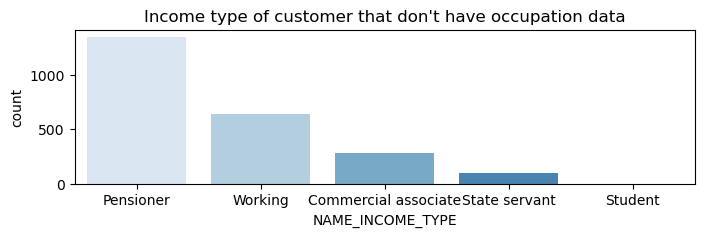

In [22]:
# check the income type of customers who have no occupation data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,2))
sns.countplot(x= creditinfo_labeled[creditinfo_labeled["OCCUPATION_TYPE"].isna()]["NAME_INCOME_TYPE"], palette='Blues')
plt.title("Income type of customer that don't have occupation data")

### From the plot, most of the missing occupation data are pensioner which is make sense. We labeled occupation types of Pensioner as "Pensioner".

In [23]:
# label pensioner occupation type
creditinfo_labeled.loc[creditinfo_labeled["NAME_INCOME_TYPE"]=="Pensioner","OCCUPATION_TYPE"] = "Pensioner"

In [24]:
# Check missing data after assigning pensioner
creditinfo_labeled.isna().sum()/CC.shape[0]*100

ID_same_customer       0.00000
CODE_GENDER            0.00000
FLAG_OWN_CAR           0.00000
FLAG_OWN_REALTY        0.00000
CNT_CHILDREN           0.00000
AMT_INCOME_TOTAL       0.00000
NAME_INCOME_TYPE       0.00000
NAME_EDUCATION_TYPE    0.00000
NAME_FAMILY_STATUS     0.00000
NAME_HOUSING_TYPE      0.00000
DAYS_BIRTH             0.00000
DAYS_EMPLOYED          0.00000
FLAG_MOBIL             0.00000
FLAG_WORK_PHONE        0.00000
FLAG_PHONE             0.00000
FLAG_EMAIL             0.00000
OCCUPATION_TYPE        2.81976
CNT_FAM_MEMBERS        0.00000
group                  0.00000
dtype: float64

In [25]:
# drop null occupation rows
creditinfo_labeled = creditinfo_labeled.dropna(axis=0)

In [26]:
# Adjust DAYS_BIRTH to AGE in year
creditinfo_labeled["AGE"] = ((-creditinfo_labeled["DAYS_BIRTH"])/365).apply(int)
creditinfo_labeled = creditinfo_labeled.drop(["DAYS_BIRTH"],axis=1)

In [27]:
# Adjust DAYS_EMPLOYED to YEAR_EMPLOYED in year
creditinfo_labeled["YEAR_EMPLOYED"] = np.ceil(-(creditinfo_labeled["DAYS_EMPLOYED"]/365))
creditinfo_labeled = creditinfo_labeled.drop(["DAYS_EMPLOYED"],axis=1)

In [28]:
creditinfo_labeled = creditinfo_labeled.reset_index(drop=True)
creditinfo_labeled = creditinfo_labeled.drop(["ID_same_customer"],axis=1)

In [29]:
# Show that FLAG_MOBIL only contain value 1
creditinfo_labeled["FLAG_MOBIL"].value_counts()

1    6581
Name: FLAG_MOBIL, dtype: int64

### FLAG_MOBIL (Is there a mobile phone) is 1 for all row, which is not a beneficial data.

In [30]:
# Drop FLAG_MOBIL
creditinfo_labeled = creditinfo_labeled.drop('FLAG_MOBIL',axis=1)

In [31]:
creditinfo_labeled.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,group,AGE,YEAR_EMPLOYED
0,F,N,N,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,0,0,Pensioner,2,0,57,-1000.0
1,F,N,N,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,0,0,0,Pensioner,2,0,53,-1000.0
2,F,N,N,0,36000.0,Working,Secondary / secondary special,Married,With parents,1,0,0,Core staff,2,1,39,2.0
3,F,N,N,0,36900.0,Pensioner,Higher education,Married,House / apartment,0,0,0,Pensioner,2,0,61,-1000.0
4,F,N,N,0,45000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,1,0,Pensioner,2,0,53,-1000.0
5,F,N,N,0,45000.0,State servant,Secondary / secondary special,Married,House / apartment,1,1,0,Core staff,2,1,50,11.0
6,F,N,N,0,45000.0,Working,Higher education,Married,House / apartment,1,0,0,Accountants,2,0,50,9.0
7,F,N,N,0,45000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,Sales staff,2,0,48,8.0
8,F,N,N,0,45000.0,Working,Secondary / secondary special,Separated,House / apartment,0,1,0,Sales staff,1,0,39,3.0
9,F,N,N,0,47250.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,0,0,Pensioner,2,0,65,-1000.0


### Check WOE(weight of evidence), and IV (information value) of the rest.
Concepts such as Information Value (IV) and Weight of Evidence (WOE) developed
from logistic regression. They serve as standards by which to measure how significant
various factors are in a credit scoring system. In a dataset, WOE denotes the division
between good and bad clients. We can ascertain whether the predictor variable is
significant in predicting the target variable by using WOE.
WOE = ln(Distributionof Goods/Distributionof Bads)
<br>
where,
<br>
Distribution of Goods = The number of good customers in the data
<br>
Distribution of Bads = The number of bad customers in the data
<br>
ln= Natural log
<br>
A positive WOE value indicates a greater number of good customers than bad customers
and a negative WOE value means the count of bad customers is more than good
customers.
<br>
Information Value (IV) is a useful tool for assessing the significance of the predictor variables and identifying which ones can be removed.
<br>
 IV = sum(\% of non events - \% of events )* WOE 

In [32]:
# define WOE (weight of evidence) fuction:
def WOE_calc(df,col_name):
    WOE = pd.DataFrame()
    total_bad = df["group"].sum()
    total_good = df.shape[0]-total_bad
    WOE["Dist_bad"]  = (creditinfo_labeled.groupby(col_name)["group"].sum())/total_bad
    WOE["Dist_good"] = (creditinfo_labeled.groupby(col_name)["group"].count()-creditinfo_labeled.groupby(col_name)["group"].sum())/total_good
    WOE["WOE"] = (np.log((WOE["Dist_good"]/WOE["Dist_bad"])))
    IV = (WOE["WOE"]*(WOE["Dist_good"]-WOE["Dist_bad"])).sum() # information value
    return [WOE, IV]

In [33]:
### Flag phone
[WOE, IV] = WOE_calc(creditinfo_labeled,"FLAG_PHONE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.01989068013513098


,Dist_bad,Dist_good,WOE
FLAG_PHONE,,,
1,0.356164,0.290287,-0.204521
0,0.643836,0.709713,0.097417


In [34]:
### flag work phone
[WOE, IV] = WOE_calc(creditinfo_labeled,"FLAG_WORK_PHONE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.0034174513921442357


,Dist_bad,Dist_good,WOE
FLAG_WORK_PHONE,,,
1,0.239726,0.215229,-0.107793
0,0.760274,0.784771,0.031713


In [35]:
### flag own car
[WOE, IV] = WOE_calc(creditinfo_labeled,"FLAG_OWN_CAR")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.002650460009821847


,Dist_bad,Dist_good,WOE
FLAG_OWN_CAR,,,
N,0.650685,0.625952,-0.038752
Y,0.349315,0.374048,0.068410


In [36]:
### flag email
[WOE, IV] = WOE_calc(creditinfo_labeled,"FLAG_EMAIL")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.00014638452310513243


,Dist_bad,Dist_good,WOE
FLAG_EMAIL,,,
1,0.089041,0.085625,-0.039115
0,0.910959,0.914375,0.003742


In [37]:
### flag own realty
[WOE, IV] = WOE_calc(creditinfo_labeled,"FLAG_OWN_REALTY")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.04742413792877241


,Dist_bad,Dist_good,WOE
FLAG_OWN_REALTY,,,
N,0.424658,0.319658,-0.284031
Y,0.575342,0.680342,0.167630


In [38]:
# percentage of each category in income type:
creditinfo_labeled["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

Working                 48.700805
Commercial associate    23.218356
Pensioner               20.528795
State servant            7.536849
Student                  0.015195
Name: NAME_INCOME_TYPE, dtype: float64

In [39]:
#income type count for student is very low so dropping student :
creditinfo_labeled = creditinfo_labeled[creditinfo_labeled["NAME_INCOME_TYPE"]!="Student"]
creditinfo_labeled["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

Working                 48.708207
Commercial associate    23.221884
Pensioner               20.531915
State servant            7.537994
Name: NAME_INCOME_TYPE, dtype: float64

In [40]:
## name income type
[WOE, IV] = WOE_calc(creditinfo_labeled,"NAME_INCOME_TYPE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.019241672668087073


,Dist_bad,Dist_good,WOE
NAME_INCOME_TYPE,,,
Pensioner,0.253425,0.204228,-0.215832
Commercial associate,0.246575,0.231893,-0.061391
State servant,0.068493,0.075536,0.097878
Working,0.431507,0.488343,0.123735


In [41]:
#replacing Academic degree with Higher education and Secondary / secondary special with Secondary/Lower. So now we have three 
#categories:Secondary/Lower,Higher education and Incomplete higher
creditinfo_labeled["NAME_EDUCATION_TYPE"] = creditinfo_labeled["NAME_EDUCATION_TYPE"].replace({"Academic degree":"Higher education",                                                                       "Lower secondary":"Secondary/Lower",
                                            "Secondary / secondary special":"Secondary/Lower"})
creditinfo_labeled["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100

Secondary/Lower      72.127660
Higher education     24.574468
Incomplete higher     3.297872
Name: NAME_EDUCATION_TYPE, dtype: float64

In [42]:
#education type
[WOE, IV] = WOE_calc(creditinfo_labeled,"NAME_EDUCATION_TYPE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.025382362284733485


,Dist_bad,Dist_good,WOE
NAME_EDUCATION_TYPE,,,
Incomplete higher,0.047945,0.032639,-0.384548
Higher education,0.301370,0.244482,-0.209195
Secondary/Lower,0.650685,0.722878,0.105216


In [43]:
## family status
creditinfo_labeled["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100

Married                 68.617021
Single / not married    13.191489
Civil marriage           7.993921
Separated                5.729483
Widow                    4.468085
Name: NAME_FAMILY_STATUS, dtype: float64

In [44]:
#we combined separated and widow into one field named Separated/Widow
creditinfo_labeled["NAME_FAMILY_STATUS"] = creditinfo_labeled["NAME_FAMILY_STATUS"].replace({"Widow":"Separated/Widow","Separated":"Separated/Widow"})
creditinfo_labeled["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100

Married                 68.617021
Single / not married    13.191489
Separated/Widow         10.197568
Civil marriage           7.993921
Name: NAME_FAMILY_STATUS, dtype: float64

In [45]:
## family status
[WOE, IV] = WOE_calc(creditinfo_labeled,"NAME_FAMILY_STATUS")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.0675763411621659


,Dist_bad,Dist_good,WOE
NAME_FAMILY_STATUS,,,
Single / not married,0.178082,0.130867,-0.308062
Separated/Widow,0.136986,0.101181,-0.302968
Married,0.650685,0.686975,0.054273
Civil marriage,0.034247,0.080976,0.860567


In [46]:
creditinfo_labeled["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100

House / apartment      89.756839
With parents            4.270517
Municipal apartment     3.313070
Rented apartment        1.443769
Office apartment        0.790274
Co-op apartment         0.425532
Name: NAME_HOUSING_TYPE, dtype: float64

In [47]:
#Co-op apartment and Office apartment has the lowest counts so combining them with House/apartment category
creditinfo_labeled["NAME_HOUSING_TYPE"] = creditinfo_labeled["NAME_HOUSING_TYPE"].replace({"Co-op apartment":"House / apartment","Office apartment":"House / apartment"})
creditinfo_labeled["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100

House / apartment      90.972644
With parents            4.270517
Municipal apartment     3.313070
Rented apartment        1.443769
Name: NAME_HOUSING_TYPE, dtype: float64

In [48]:
#housing type
# Calculate WOE
[WOE, IV] = WOE_calc(creditinfo_labeled,"NAME_HOUSING_TYPE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.07067747997683752


,Dist_bad,Dist_good,WOE
NAME_HOUSING_TYPE,,,
Municipal apartment,0.089041,0.031862,-1.027684
Rented apartment,0.020548,0.014299,-0.362569
House / apartment,0.863014,0.910786,0.053878
With parents,0.027397,0.043053,0.451978


In [49]:
## occupation
creditinfo_labeled["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Pensioner                20.531915
Laborers                 20.212766
Sales staff              11.185410
Core staff               10.349544
Managers                  9.255319
Drivers                   7.446809
High skill tech staff     4.331307
Medicine staff            3.738602
Accountants               3.677812
Security staff            2.158055
Cooking staff             2.127660
Cleaning staff            1.732523
Private service staff     0.957447
Secretaries               0.623100
Low-skill Laborers        0.562310
Waiters/barmen staff      0.440729
HR staff                  0.288754
IT staff                  0.243161
Realty agents             0.136778
Name: OCCUPATION_TYPE, dtype: float64

In [50]:
#removing the categories with less count
creditinfo_labeled = creditinfo_labeled[~creditinfo_labeled["OCCUPATION_TYPE"].isin(["Private service staff","Low-skill Laborers",
                                                             "Secretaries","Waiters/barmen staff","HR staff","IT staff",
                                                             "Realty agents"])]

In [51]:
# Calculate WOE
[WOE, IV] = WOE_calc(creditinfo_labeled,"OCCUPATION_TYPE")
print("Information value (IV):", IV)
WOE.sort_values("WOE")

Information value (IV): 0.13335168985679605


,Dist_bad,Dist_good,WOE
OCCUPATION_TYPE,,,
Security staff,0.034965,0.022015,-0.462620
Core staff,0.160839,0.105737,-0.419452
Accountants,0.048951,0.037763,-0.259487
High skill tech staff,0.055944,0.044512,-0.228587
Pensioner,0.258741,0.211152,-0.203249
Laborers,0.216783,0.208742,-0.037800
Cleaning staff,0.013986,0.017998,0.252189
Sales staff,0.076923,0.116503,0.415114
Managers,0.062937,0.096417,0.426542


###  
A variable's prediction ability is measured by IV value.An IV value of <0.02 indicates almost no predictive power.
So for FLAG_WORK_PHONE,FLAG_EMAIL,FLAG_PHONE,FLAG_OWN_CAR,NAME_INCOME_TYPE
the IV value is less than 0.02 and we decide to drop these columns.

In [52]:
#drop columns with low IV value
creditinfo_labeled = creditinfo_labeled.drop(["FLAG_WORK_PHONE","FLAG_EMAIL","FLAG_PHONE",
                                              "FLAG_OWN_CAR","NAME_INCOME_TYPE"],axis=1)


In [54]:
creditinfo_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6580
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          6366 non-null   object 
 1   FLAG_OWN_REALTY      6366 non-null   object 
 2   CNT_CHILDREN         6366 non-null   int64  
 3   AMT_INCOME_TOTAL     6366 non-null   float64
 4   NAME_EDUCATION_TYPE  6366 non-null   object 
 5   NAME_FAMILY_STATUS   6366 non-null   object 
 6   NAME_HOUSING_TYPE    6366 non-null   object 
 7   OCCUPATION_TYPE      6366 non-null   object 
 8   CNT_FAM_MEMBERS      6366 non-null   int64  
 9   group                6366 non-null   int32  
 10  AGE                  6366 non-null   int64  
 11  YEAR_EMPLOYED        6366 non-null   float64
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 621.7+ KB


# Data Imbalance <a name ="DataImbalance"></a>

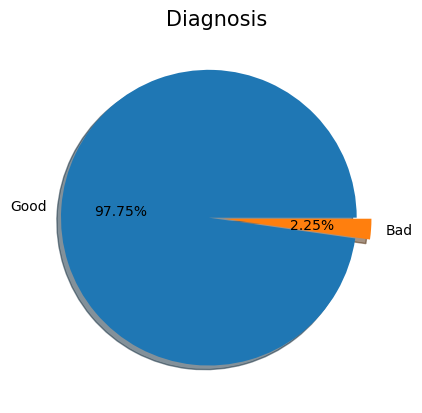

In [55]:
#The target variable is group which has two value good and bad
#check for data imbalance
import matplotlib.pyplot as plt
creditinfo_labeled['group'].value_counts()
plt.pie(creditinfo_labeled['group'].value_counts(), labels=['Good','Bad'], 
        explode=[0.05, 0.05],autopct='%1.2f%%', shadow=True)
plt.title('Diagnosis', fontsize=15)

plt.show()

In [56]:
#to handle data imbalance we will use resample technique to increase the samples of the minorty class.
#This will reduce the data imbalance between the two classes.
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
CC_majority = creditinfo_labeled[(creditinfo_labeled['group']==0)] 
CC_minority = creditinfo_labeled[(creditinfo_labeled['group']==1)] 
# upsample minority class
CC_minority_upsampled = resample(CC_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5500, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
CC_upsampled = pd.concat([CC_minority_upsampled, CC_majority])

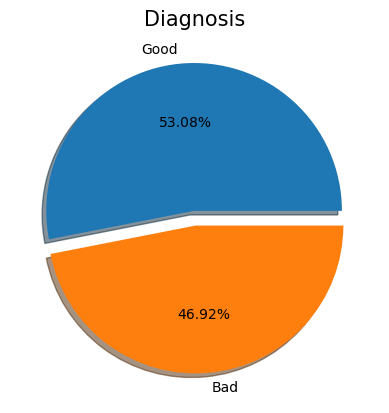

In [57]:
#The target variable is group which has two value good and bad
#check for data imbalance
import matplotlib.pyplot as plt
CC_upsampled['group'].value_counts()
plt.pie(CC_upsampled['group'].value_counts(), labels=['Good','Bad'], 
        explode=[0.05, 0.05],autopct='%1.2f%%', shadow=True)
plt.title('Diagnosis', fontsize=15)

plt.show()

# Exploratory Data Analysis (EDA) <a name="EDA"></a>

## Univariate Data Analysis  <a name="Uni"></a>
 We have plotted the categorical columns in our dataset to get a better idea of the counts of the different categories present for each variable. From the graphical representation we aim to achieve a better understanding of the type of data the predictor variables consist of in the dataset.

In [58]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:

#rename columns
CC_upsampled = CC_upsampled.rename(columns={
    'CODE_GENDER':'Gender',
    'CNT_CHILDREN':'Children_count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_EDUCATION_TYPE':'Education',
    'NAME_FAMILY_STATUS':'Marital_status',
    'DAYS_BIRTH':'Age',
    'YEAR_EMPLOYED': 'Employment_length',
    'FLAG_OWN_REALTY': 'Property',
    'OCCUPATION_TYPE': 'Occupation',
    'CNT_FAM_MEMBERS': 'Family_member_count',
    'NAME_HOUSING_TYPE':'Housing'}
)

In [60]:
CC_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11723 entries, 4603 to 6580
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               11723 non-null  object 
 1   Property             11723 non-null  object 
 2   Children_count       11723 non-null  int64  
 3   Income               11723 non-null  float64
 4   Education            11723 non-null  object 
 5   Marital_status       11723 non-null  object 
 6   Housing              11723 non-null  object 
 7   Occupation           11723 non-null  object 
 8   Family_member_count  11723 non-null  int64  
 9   group                11723 non-null  int32  
 10  AGE                  11723 non-null  int64  
 11  Employment_length    11723 non-null  float64
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 1.1+ MB


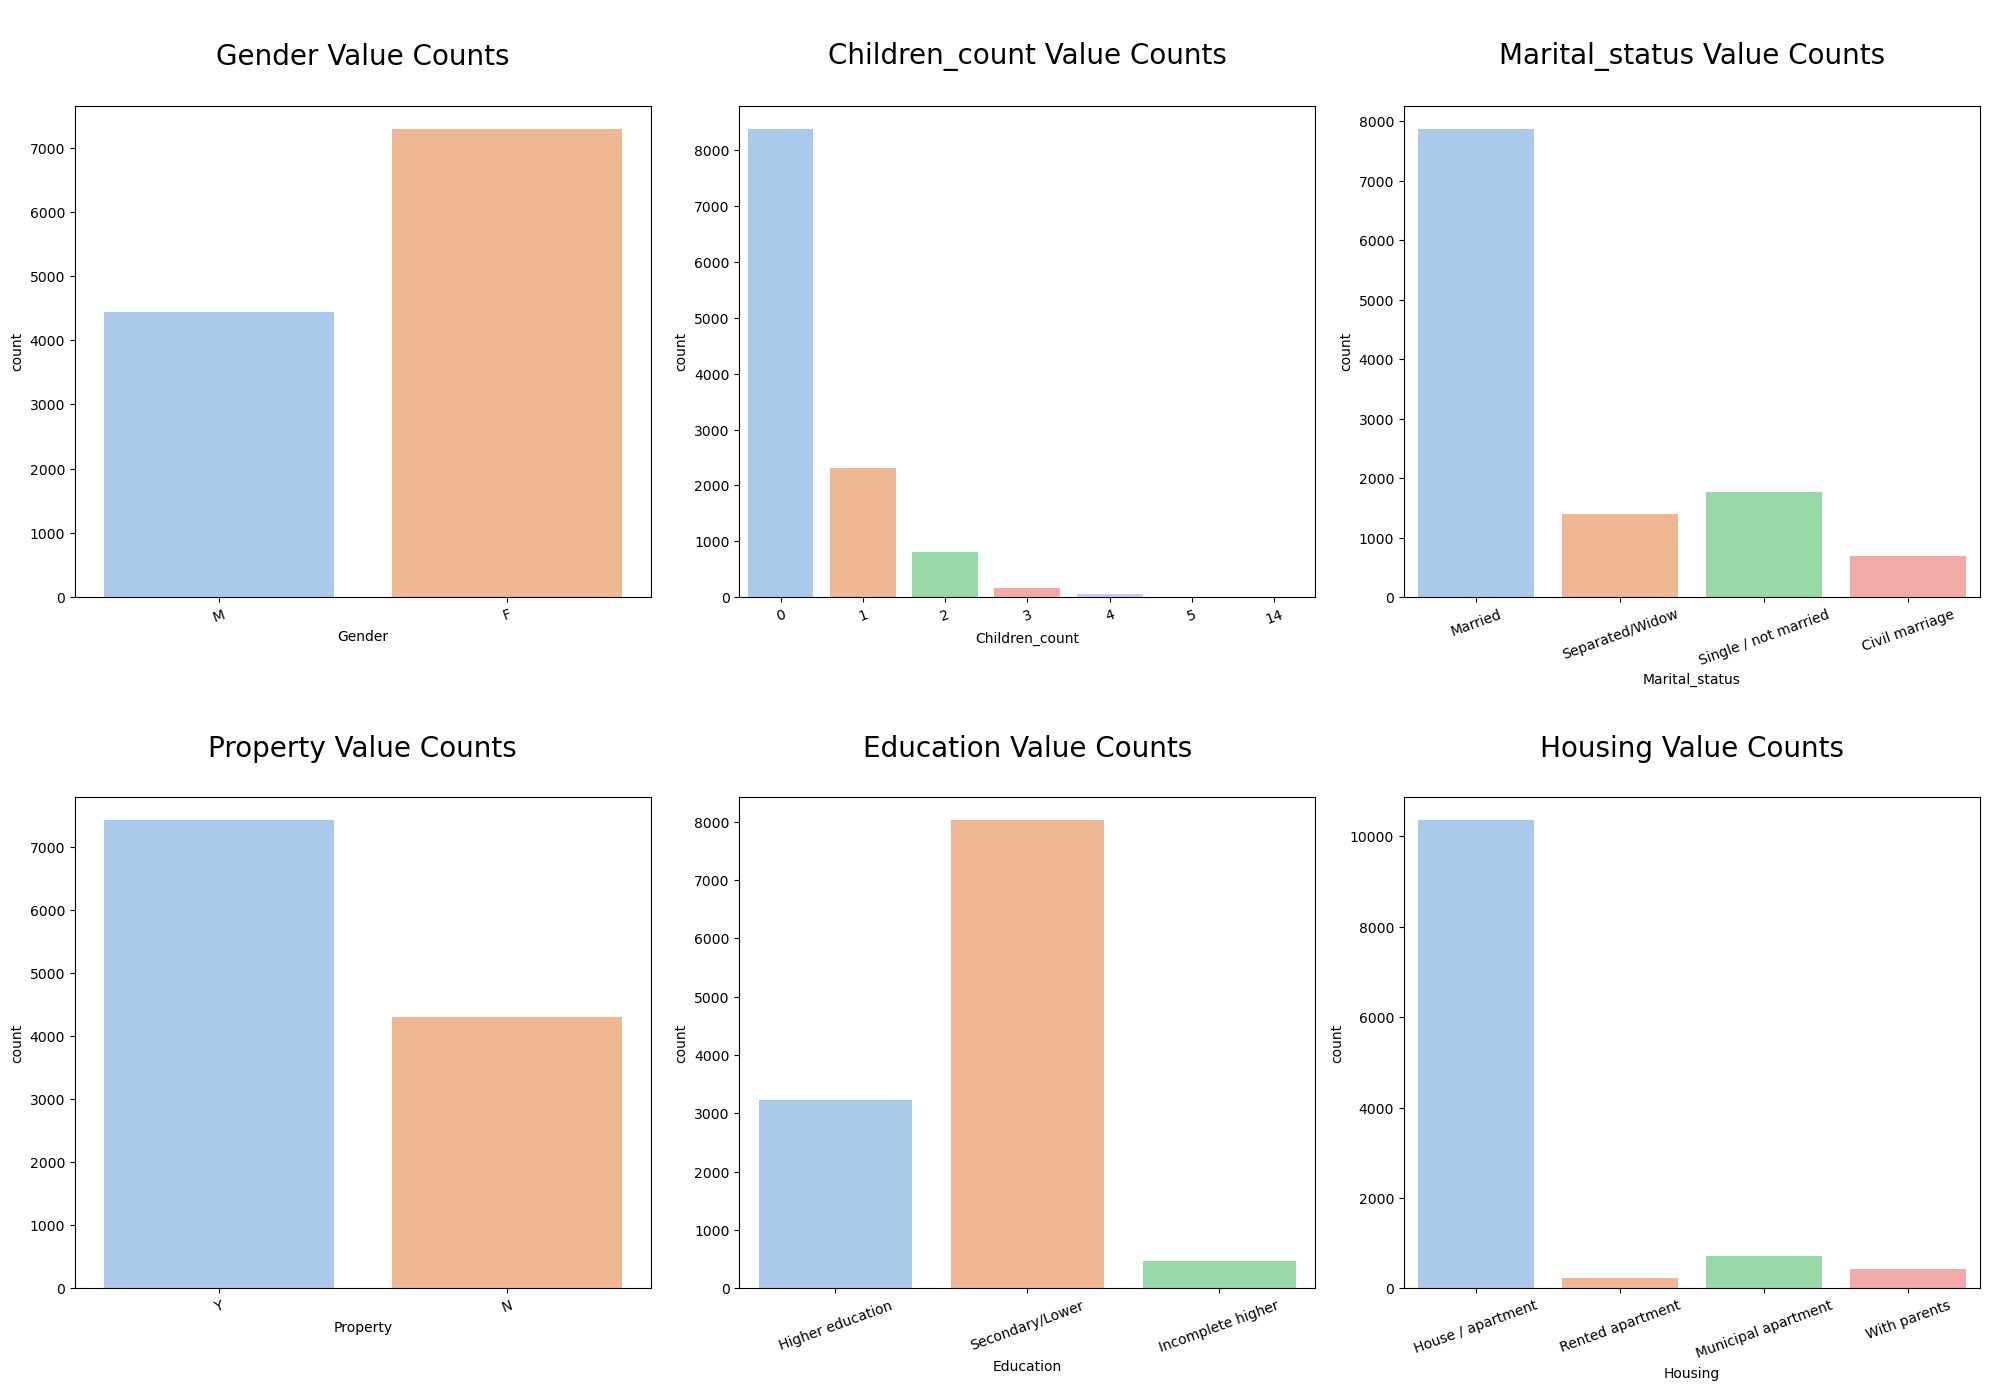

In [62]:
#Checking the categorical columns data
# creating a list of categorical coumns
colsList = ['Gender','Children_count','Marital_status','Property','Education','Housing']

plt.figure(figsize = (20, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(colsList)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(x = colsList[i], data = CC_upsampled, ax = ax, palette='pastel')
        plt.title(f"\n{colsList[i]} Value Counts\n", fontsize = 20)
        plt.xticks(rotation=20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Pensioner'),
  Text(1, 0, 'Security staff'),
  Text(2, 0, 'Sales staff'),
  Text(3, 0, 'Core staff'),
  Text(4, 0, 'Laborers'),
  Text(5, 0, 'Medicine staff'),
  Text(6, 0, 'Managers'),
  Text(7, 0, 'High skill tech staff'),
  Text(8, 0, 'Accountants'),
  Text(9, 0, 'Cooking staff'),
  Text(10, 0, 'Drivers'),
  Text(11, 0, 'Cleaning staff')])

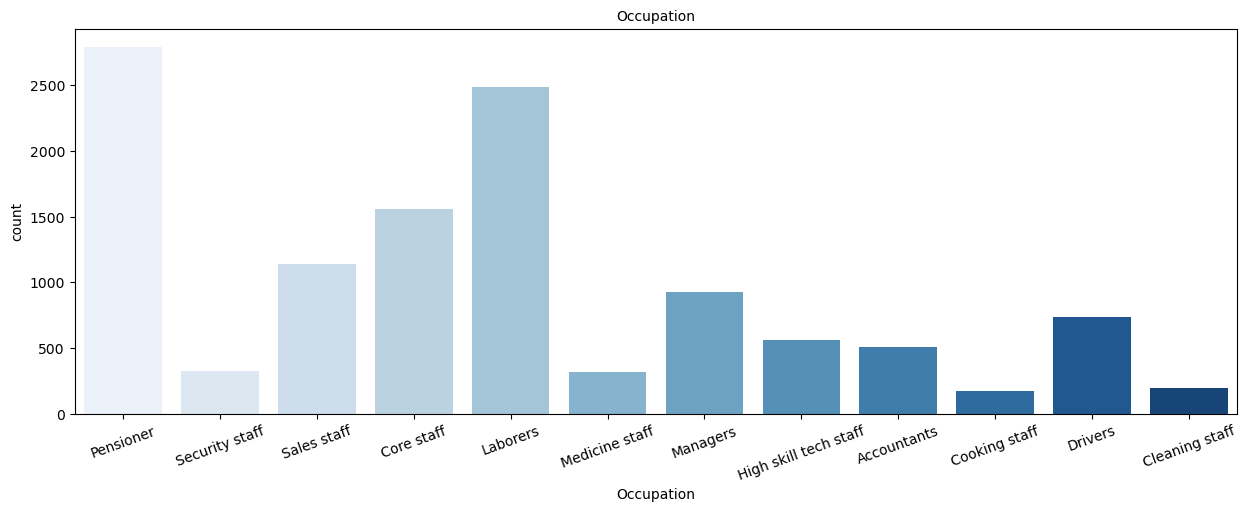

In [63]:
plt.figure(figsize=(15, 5))

sns.countplot(x='Occupation', data=CC_upsampled, palette='Blues')
plt.title('Occupation', fontsize=10)
plt.xticks(rotation=20)


# Numerical Data

# Bivariate Data Analysis <a name="Bi"></a>

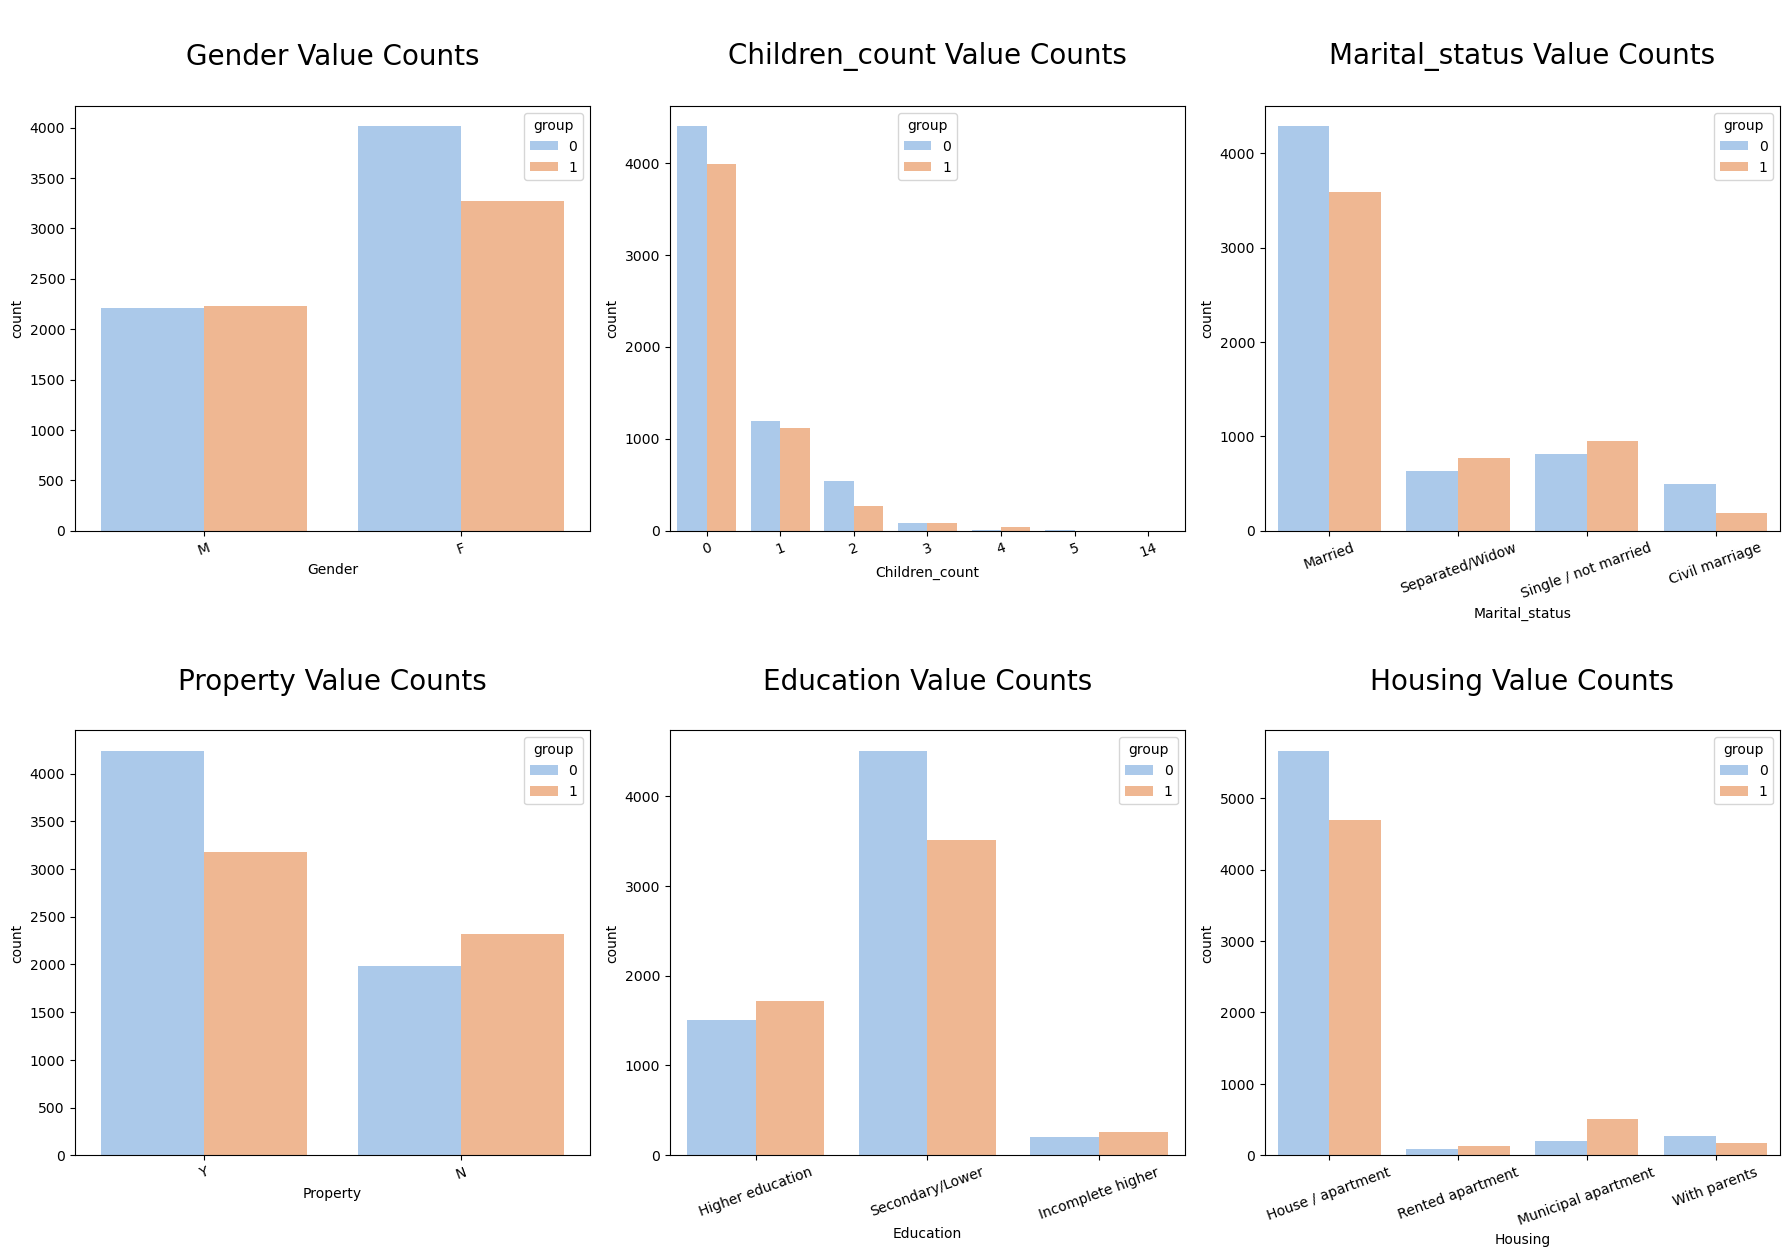

In [65]:
# creating a list of categorical coumns     
colsList = ['Gender','Children_count','Marital_status','Property','Education','Housing']  
plt.figure(figsize = (18, 18))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(colsList)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(x = colsList[i], data = CC_upsampled, ax = ax, palette='pastel',hue='group')
        plt.title(f"\n{colsList[i]} Value Counts\n", fontsize = 20)
        plt.xticks(rotation=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Pensioner'),
  Text(1, 0, 'Security staff'),
  Text(2, 0, 'Sales staff'),
  Text(3, 0, 'Core staff'),
  Text(4, 0, 'Laborers'),
  Text(5, 0, 'Medicine staff'),
  Text(6, 0, 'Managers'),
  Text(7, 0, 'High skill tech staff'),
  Text(8, 0, 'Accountants'),
  Text(9, 0, 'Cooking staff'),
  Text(10, 0, 'Drivers'),
  Text(11, 0, 'Cleaning staff')])

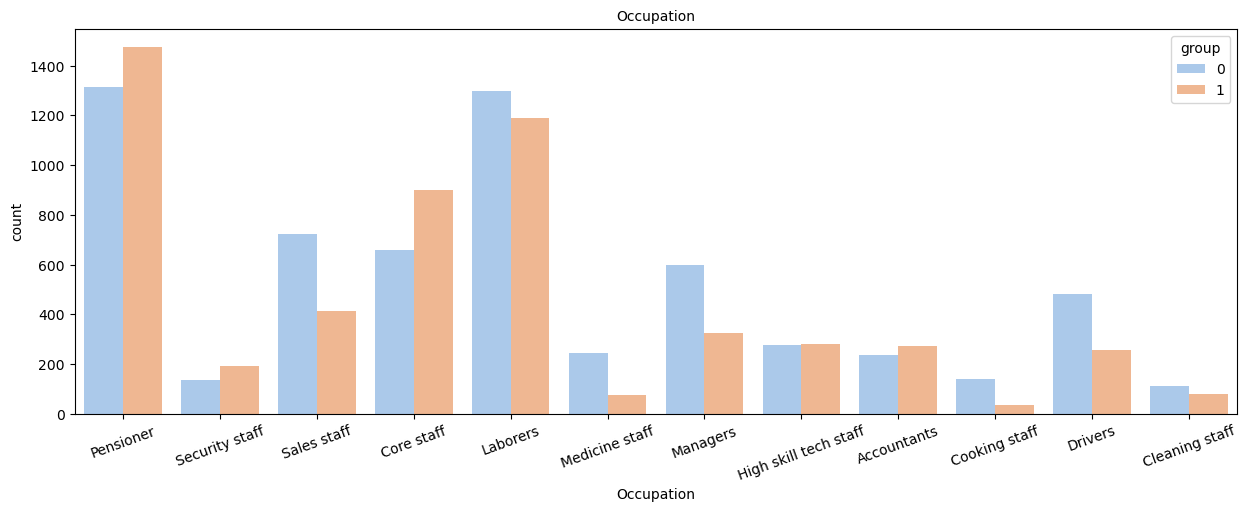

In [66]:
plt.figure(figsize=(15, 5))

#plt.subplot(3, 3, 1)
sns.countplot(x='Occupation', data=CC_upsampled, palette='pastel',hue='group')
plt.title('Occupation', fontsize=10)
plt.xticks(rotation=20)


In [68]:
#violin plots for numerical variables
import plotly.express as px
numerical_cols = ['Income','AGE','Employment_length','Family_member_count']

for col_count in numerical_cols:
    fig = px.violin(CC_upsampled, x='group', y=col_count,box=True)
    fig.show()


# Correlation Map <a name ="corr"></a>

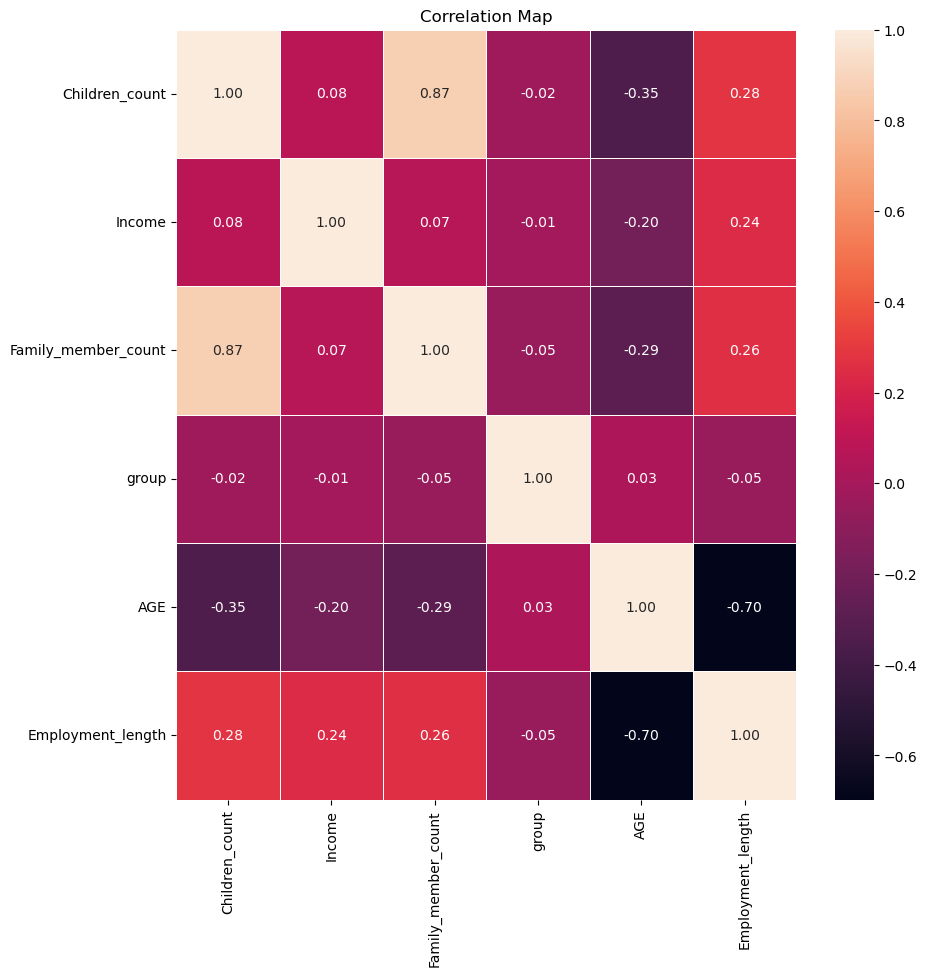

In [69]:
#The range of these numbers are -1 to 1.If the number is positive that indicates the 
#two variables are positively correlated.A negative value indicates that there is 
#negative correlation and zero means there is no correlation.
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(CC_upsampled.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

# Methods <a name="methods"></a>

# Train and test data sets <a name="traintest"></a>

In [70]:
from sklearn.model_selection import train_test_split
#feature vector  
X = CC_upsampled.drop(['group'], axis=1)
X_names = X.columns.tolist()
#target variable
y = CC_upsampled['group']
y_names=['Good','Bad'] 
# split data into 78:22 training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22,
                                              random_state =23 ,stratify=y)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((9143, 11), (2580, 11))

In [71]:

# import category encoders
!pip install category-encoders
import category_encoders as ce

In [74]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Gender', 'Property','Education','Housing','Marital_status','Occupation'])

In [75]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Feature Importances <a name="imp"></a>

In [77]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [78]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False)
feature_scores

AGE                    0.250762
Income                 0.226017
Employment_length      0.145958
Occupation             0.104669
Marital_status         0.049697
Education              0.047156
Family_member_count    0.047021
Gender                 0.034445
Housing                0.031888
Children_count         0.031331
Property               0.031056
dtype: float64

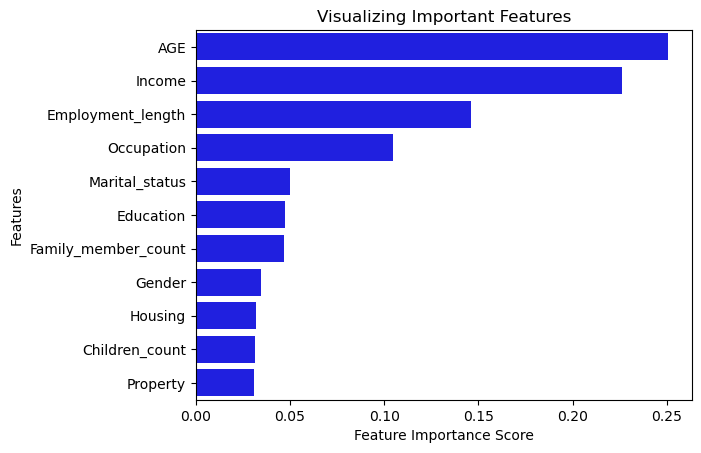

In [79]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index,color='blue')
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

# Normalize and Scaling the data <a name="scale"></a>

In [80]:
from sklearn.preprocessing import StandardScaler 
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
# normalizing the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choosing the best parameters for the model   <a name="param"></a>
# Machine Learning models
 1.KNN
 <br>
 2.Decision Tree
<br>
 3.Random Forest
<br>
 4.SVC
<br>
 5.Adaboost
<br>
 6.Naive Baiyes Classifier
<br>
 7.Logistic Regression
<br>
 8.Ensemble Voting Classifier

In [81]:
#gridsearch cross validation
from sklearn.model_selection import GridSearchCV
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

# KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
gs_knn = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
print('Best parameters for KNN: ', gridsearch(gs_knn , knn_params))

Best parameters for KNN:  {'n_neighbors': 3}


# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8]
dectree_params = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
print(f'Best parameters for Decision Tree: ', gridsearch(pipe , dectree_params))

Best parameters for Decision Tree:  {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 8, 'pca__n_components': 9}


# Random Forest

In [85]:
gs_rf = RandomForestClassifier(random_state = 0)
rf_params = {
 'n_estimators':[200,500],
 'criterion': ('gini','entropy'),
 'max_depth': [2, 3 ,4],
 'min_samples_split': [2, 6],
 'max_features': ("auto", "sqrt", "log2") }
print('Best parameters for Random Forest: ', gridsearch(gs_rf , rf_params))

Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 200}


# SVC

In [86]:
from sklearn.svm import SVC
svm_gs = SVC()
svm_params = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}
print(f'Best parameters for SVM: ', gridsearch(svm_gs , svm_params))

Best parameters for SVM:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


# Adaboost

In [87]:
from sklearn.ensemble import AdaBoostClassifier
gs_adb = AdaBoostClassifier(random_state = 0)
adb_params ={
    'n_estimators':[10, 50, 100, 250, 500, 1000],
    'learning_rate':[0.001, 0.01, 0.1, 1]}
print(f'Best parameters for AdaBoost: ', gridsearch(gs_adb , adb_params))

Best parameters for AdaBoost:  {'learning_rate': 1, 'n_estimators': 1000}


# Build models

In [88]:
knn = KNeighborsClassifier(n_neighbors= 3)
decision_tree = DecisionTreeClassifier(criterion='gini', 
                            max_depth=8, random_state=0)
rf  = RandomForestClassifier(max_depth=4, random_state=23 , criterion= 'gini', 
                max_features='auto' , min_samples_split= 2 , n_estimators= 500)
svc = SVC(kernel='rbf', random_state=0, gamma=1, C=10)
adb  = AdaBoostClassifier(n_estimators=1000, learning_rate = 1, random_state=0)

# Naive Baiyes

In [89]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

# Model metrics <a name="metrics"></a>
The classification report has been generated from which we can observe the precision,recall,f1-
score and accuracy for both the classes in the classification problem.

In [91]:
from sklearn.metrics import classification_report
def creport(model):
    ypred = model.predict(X_test)
    return classification_report(y_test, ypred)    

In [92]:
KNN = knn
KNN.fit(X_train,y_train)
print(creport(KNN))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1370
           1       0.94      1.00      0.97      1210

    accuracy                           0.97      2580
   macro avg       0.97      0.97      0.97      2580
weighted avg       0.97      0.97      0.97      2580



In [93]:
SVC = svc
SVC.fit(X_train,y_train)
print(creport(SVC))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1370
           1       0.93      1.00      0.96      1210

    accuracy                           0.96      2580
   macro avg       0.96      0.96      0.96      2580
weighted avg       0.96      0.96      0.96      2580



In [94]:
DT = decision_tree 
DT.fit(X_train,y_train)
print(creport(DT))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1370
           1       0.69      0.81      0.74      1210

    accuracy                           0.74      2580
   macro avg       0.74      0.74      0.74      2580
weighted avg       0.75      0.74      0.74      2580



In [95]:
RF = rf 
RF.fit(X_train,y_train)
print(creport(RF))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1370
           1       0.72      0.59      0.65      1210

    accuracy                           0.70      2580
   macro avg       0.70      0.69      0.69      2580
weighted avg       0.70      0.70      0.70      2580



In [96]:
nv=model
nv.fit(X_train,y_train)
print(creport(nv))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1370
           1       0.54      0.48      0.51      1210

    accuracy                           0.56      2580
   macro avg       0.56      0.56      0.56      2580
weighted avg       0.56      0.56      0.56      2580



In [97]:
lg.fit(X_train,y_train)
print(creport(lg))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64      1370
           1       0.57      0.45      0.50      1210

    accuracy                           0.58      2580
   macro avg       0.58      0.57      0.57      2580
weighted avg       0.58      0.58      0.58      2580



In [98]:
ADB = adb 
ADB.fit(X_train,y_train)
print(creport(ADB))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1370
           1       0.72      0.75      0.73      1210

    accuracy                           0.74      2580
   macro avg       0.74      0.74      0.74      2580
weighted avg       0.74      0.74      0.74      2580



# k fold cross validation <a name="cv"></a>

In [99]:
X = encoder.transform(X)

In [100]:
# Use 10-fold cross-validation to compute the mean accuracy of the models
from sklearn.model_selection import cross_val_score
import math
#KNN
cv_scores_knn = round(cross_val_score(KNN, X, y, cv=10).mean(),2)
#print(cross_val_score(KNN, X, y, cv=5,error_score="raise"))
#SVC
cv_scores_svc =  round(cross_val_score(SVC, X, y, cv=10).mean(),2)
#Decision tree
maxDepth = 6
decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=2)
cv_scores_dt =  round(cross_val_score(decision_tree, X, y, cv=10).mean(),2)
#random forest
cv_scores_rf =  round(cross_val_score(RF, X, y, cv=10).mean(),2)
#Adaboost
cv_scores_adb =  round(cross_val_score(ADB,X, y, cv=10).mean(),2)
#bernoulliNB
cv_scores_nv =  round(cross_val_score(nv, X, y, cv=10).mean(),2)
#logistic regression
cv_scores_lg =  round(cross_val_score(lg, X, y, cv=10).mean(),2)

In [101]:
cross_val_scores =  pd.DataFrame({'Model':['KNN','Decison Trees',
                                           'Random Forest', 'AdaBoost',
                                           'Naives Bayes','Logistic Regression'],                  
    'Cross Validation Scores':[cv_scores_knn,cv_scores_dt,
                               cv_scores_rf,cv_scores_adb,
                               cv_scores_nv,cv_scores_lg]
                  })
print(cross_val_scores)

                 Model  Cross Validation Scores
0                  KNN                     0.97
1        Decison Trees                     0.63
2        Random Forest                     0.61
3             AdaBoost                     0.70
4         Naives Bayes                     0.52
5  Logistic Regression                     0.52


With a score of 97%, KNN has the highest ranking, followed by Adaboost and Decision Tree, with scores of 70% and 63%, respectively. A high score shows that the model can identify relationships and patterns in the data, leading to accurate predictions.

# Prediction on Train and Test models <a name="pred"></a>

In [102]:
y_train_pred_knn = KNN.predict(X_train)
y_train_pred_svc = SVC.predict(X_train)
y_train_pred_dt = DT.predict(X_train)
y_train_pred_rf = RF.predict(X_train)
y_train_pred_adb = ADB.predict(X_train)
y_train_pred_nv = nv.predict(X_train)
y_train_pred_lg = lg.predict(X_train)

In [115]:
# import the builtin time module
import time
# Grab Currrent Time Before Running the Code
start = time.time()
y_test_pred_knn = KNN.predict(X_test)
# Grab Currrent Time After Running the Code
end = time.time()
#Subtract Start Time from The End Time
total_time_knn = (end - start)

start = time.time()
y_test_pred_svc = SVC.predict(X_test)
end = time.time()
total_time_svc = (end - start)

start = time.time()
y_test_pred_dt = DT.predict(X_test)
end = time.time()
total_time_dt = (end - start)

start = time.time()
y_test_pred_rf = RF.predict(X_test)
end = time.time()
total_time_rf = (end - start)

start = time.time()
y_test_pred_adb = ADB.predict(X_test)
end = time.time()
total_time_adb = (end - start)

start = time.time()
y_test_pred_nv= nv.predict(X_test)
end = time.time()
total_time_nv = (end - start)

start = time.time()
y_test_pred_lg = lg.predict(X_test)
end = time.time()
total_time_lg = (end - start)

In [116]:
from sklearn.metrics import accuracy_score
def accuracy(y_test , ypred):
    return round(accuracy_score(y_test , ypred),2)

In [117]:
from sklearn.metrics import f1_score
def f1(y_test , ypred):
    return round(f1_score(y_test, ypred, average='macro'),2)

In [118]:
from sklearn.metrics import recall_score
def recall(y_test , ypred):
    return round(recall_score(y_test, ypred, average='macro'),2)

In [119]:
from sklearn.metrics import precision_score
def precision(y_test , y_pred):
    return round(precision_score(y_test, y_pred),2)

In [120]:
from sklearn.metrics import roc_auc_score
def roc_auc(y_test , y_pred):
    return round(roc_auc_score(y_test, y_pred),2)

# Ensemble Voting Classifier <a name="ensemble"></a>

In [121]:
from sklearn.ensemble import VotingClassifier
# Create an ensemble voting classifier
voting_classifier = VotingClassifier(estimators=[  ('svm', SVC),('dt', DT),
                                                 ('rf',RF),('adb',ADB),
                                                 ('bernoulli',nv),('lr', lg)],
                                                 voting='hard')


# Train the ensemble classifier
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(C=10, gamma=1, random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=8,
                                                     random_state=0)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=500,
                                                     random_state=23)),
                             ('adb',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=1000,
                                                 random_state=0)),
                             ('bernoulli', BernoulliNB()),
                             ('lr', LogisticRegression())])

In [122]:
# Predict on the training data
y_train_pred_ensemble = voting_classifier.predict(X_train)
# Make predictions on the test set
start = time.time()
y_test_pred_ensemble = voting_classifier.predict(X_test)
end = time.time()
total_time_ensemble = (end - start)

## Compare the train and test scores for the models <a name="compare"></a>

In [123]:
all_evaluate = pd.DataFrame({'Model':['KNN','SVC','Decison Trees','Random Forest',
                                      'AdaBoost','Naives Bayes',
                                      'Logistic Regression',
                                      'Ensemble Voting Classifier'],
'Train Accuracy':[accuracy(y_train,y_train_pred_knn), 
                  accuracy(y_train,y_train_pred_svc), 
                  accuracy(y_train,y_train_pred_dt),
                  accuracy(y_train,y_train_pred_rf),
                  accuracy(y_train,y_train_pred_adb),
                  accuracy(y_train,y_train_pred_nv),
                  accuracy(y_train,y_train_pred_lg),
                  accuracy(y_train,y_train_pred_ensemble)],

'Test Accuracy':[accuracy(y_test,y_test_pred_knn),
                 accuracy(y_test,y_test_pred_svc),
                 accuracy(y_test,y_test_pred_dt),
                 accuracy(y_test,y_test_pred_rf),
                 accuracy(y_test,y_test_pred_adb),
                 accuracy(y_test,y_test_pred_nv),
                 accuracy(y_test,y_test_pred_lg),
                 accuracy(y_test,y_test_pred_ensemble)]})

print(all_evaluate)

                        Model  Train Accuracy  Test Accuracy
0                         KNN            0.98           0.97
1                         SVC            0.97           0.96
2               Decison Trees            0.76           0.74
3               Random Forest            0.71           0.70
4                    AdaBoost            0.77           0.74
5                Naives Bayes            0.57           0.56
6         Logistic Regression            0.59           0.58
7  Ensemble Voting Classifier            0.77           0.76


# Prediction Results <a name="predresults"></a>

In [124]:
all_evaluate = pd.DataFrame({'Model':['KNN','SVC','Decision Trees','Random Forest',
                                      'AdaBoost','Naives Bayes',
                                      'Logistic Regression',
                                      'Ensemble Voting Classifier'],
                             
'Accuracy':[accuracy(y_test,y_test_pred_knn), 
            accuracy(y_test,y_test_pred_svc),
            accuracy(y_test,y_test_pred_dt), accuracy(y_test,y_test_pred_rf),
            accuracy(y_test,y_test_pred_adb),accuracy(y_test,y_test_pred_nv),
            accuracy(y_test,y_test_pred_lg),
            accuracy(y_test,y_test_pred_ensemble)],
                             
'Precision':[precision(y_test,y_test_pred_knn), 
             precision(y_test,y_test_pred_svc),
             precision(y_test,y_test_pred_dt),precision(y_test,y_test_pred_rf),
             precision(y_test,y_test_pred_adb),precision(y_test,y_test_pred_nv),
             precision(y_test,y_test_pred_lg),precision(y_test,y_test_pred_ensemble)],                           
   
                     
'Recall':[recall(y_test,y_test_pred_knn),
          recall(y_test,y_test_pred_svc), 
          recall(y_test,y_test_pred_dt),recall(y_test,y_test_pred_rf),
          recall(y_test,y_test_pred_adb),recall(y_test,y_test_pred_nv),
          recall(y_test,y_test_pred_lg),
          recall(y_test,y_test_pred_ensemble)] ,
                                      
'F1':[f1(y_test,y_test_pred_knn), 
      f1(y_test,y_test_pred_svc), 
      f1(y_test,y_test_pred_dt),f1(y_test,y_test_pred_rf),
      f1(y_test,y_test_pred_adb),f1(y_test,y_test_pred_nv),
      f1(y_test,y_test_pred_lg),f1(y_test,y_test_pred_ensemble)],
                             
'ROC_AUC':[roc_auc(y_test,y_test_pred_knn), 
           roc_auc(y_test,y_test_pred_svc),
           roc_auc(y_test,y_test_pred_dt),roc_auc(y_test,y_test_pred_rf),
           roc_auc(y_test,y_test_pred_adb),roc_auc(y_test,y_test_pred_nv),
           roc_auc(y_test,y_test_pred_lg),roc_auc(y_test,y_test_pred_ensemble)]  ,
                             
                             
 'Computational Time':[total_time_knn,total_time_svc,total_time_dt,total_time_rf,
                      total_time_adb,total_time_nv,total_time_lg,total_time_ensemble]                             
                            
                            })
print(all_evaluate)

                        Model  Accuracy  Precision  Recall    F1  ROC_AUC  \
0                         KNN      0.97       0.94    0.97  0.97     0.97   
1                         SVC      0.96       0.93    0.96  0.96     0.96   
2              Decision Trees      0.74       0.69    0.74  0.74     0.74   
3               Random Forest      0.70       0.72    0.69  0.69     0.69   
4                    AdaBoost      0.74       0.72    0.74  0.74     0.74   
5                Naives Bayes      0.56       0.54    0.56  0.56     0.56   
6         Logistic Regression      0.58       0.57    0.57  0.57     0.57   
7  Ensemble Voting Classifier      0.76       0.82    0.75  0.75     0.75   

   Computational Time  
0            0.396066  
1            0.729348  
2            0.000997  
3            0.219467  
4            0.608919  
5            0.000000  
6            0.000000  
7            1.562133  


# Explainable AI <a name="AI"></a>

In [126]:
!pip install shap

# SVC model

  0%|          | 0/2580 [00:00<?, ?it/s]

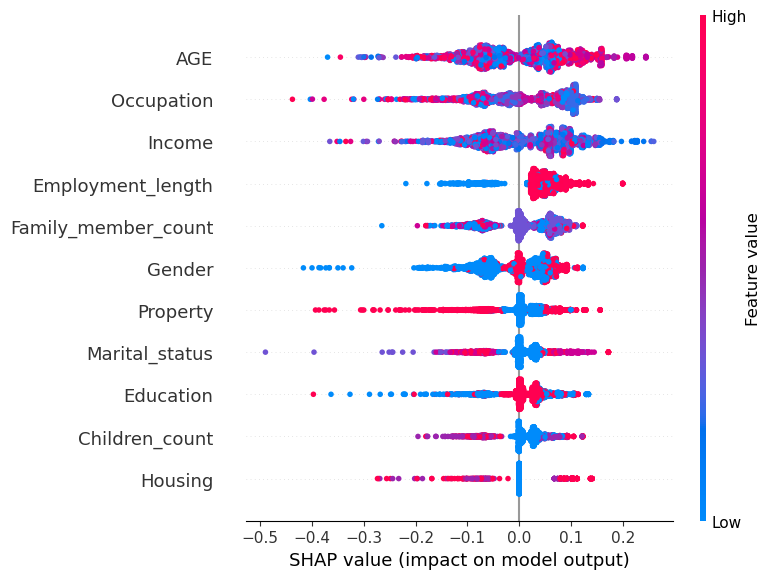

In [127]:
import shap
# Create a summarized background dataset using shap.sample
#it is computationally expensive to use large number of samples 
#for kernelexplainer so we reduce the number of samples
background_data = shap.sample(X_train, 5)  
# Adjust the number of samples as needed

# Create a kernel explainer object using your trained model 
#and the summarized background dataset
explainer = shap.KernelExplainer(SVC.predict, background_data)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)
# Interpret the SHAP values or perform desired analysis
shap.summary_plot(shap_values, X_test,feature_names=X_names) 

# Results and Discussion <a name="Result"></a>

In [125]:
results = pd.DataFrame({'Model':['KNN','SVC','Ensemble Voting Classifier','Decision Tree','AdaBoost'],
                             
'Accuracy':[accuracy(y_test,y_test_pred_knn),
            accuracy(y_test,y_test_pred_svc),
            accuracy(y_test,y_test_pred_ensemble),
            accuracy(y_test,y_test_pred_dt),
            accuracy(y_test,y_test_pred_adb)],
                             
'Precision':[precision(y_test,y_test_pred_knn),
             precision(y_test,y_test_pred_svc),
             precision(y_test,y_test_pred_ensemble),
             precision(y_test,y_test_pred_dt),
             precision(y_test,y_test_pred_adb)],                           
   
                     
'Recall':[recall(y_test,y_test_pred_knn),
          recall(y_test,y_test_pred_svc),
          recall(y_test,y_test_pred_ensemble),
          recall(y_test,y_test_pred_dt),
          recall(y_test,y_test_pred_adb)] ,
                                      
'F1':[f1(y_test,y_test_pred_knn),
      f1(y_test,y_test_pred_svc),
      f1(y_test,y_test_pred_ensemble),
      f1(y_test,y_test_pred_dt),
      f1(y_test,y_test_pred_adb)],
                             
'ROC_AUC':[roc_auc(y_test,y_test_pred_knn),
           roc_auc(y_test,y_test_pred_svc),
           roc_auc(y_test,y_test_pred_ensemble),
           roc_auc(y_test,y_test_pred_dt),
           roc_auc(y_test,y_test_pred_adb)] ,
                        
'Computational Time':[total_time_knn,
                      total_time_svc,
                      total_time_ensemble,
                      total_time_dt,
                      total_time_adb
                      ]       
                              
                            
                            })
print(results)

                        Model  Accuracy  Precision  Recall    F1  ROC_AUC  \
0                         KNN      0.97       0.94    0.97  0.97     0.97   
1                         SVC      0.96       0.93    0.96  0.96     0.96   
2  Ensemble Voting Classifier      0.76       0.82    0.75  0.75     0.75   
3               Decision Tree      0.74       0.69    0.74  0.74     0.74   
4                    AdaBoost      0.74       0.72    0.74  0.74     0.74   

   Computational Time  
0            0.396066  
1            0.729348  
2            1.562133  
3            0.000997  
4            0.608919  
